# DAO2NFT: increase DAO Health using reputation NFTs

## Research Topic/Question
- a. How can we make DAOs well functioning organisations?
    - i. Increasing DAO member (stakeholder) engagement
    - ii. Identify reward systems for different stakeholders
    - iii. Balance parameter settings in Grant logistics
- b. Can we derive assumptions of what might increase DAO's health?
    - i. Under what conditions will stakeholder participation grow?
    - ii. Under what conditions is grant funding well spent?

## Test agents

Stakeholders of DAOs are:
- Investors (Stakers)
- DAO Protocol initiators (Ambassadors)
- DAO Consumers
- DAO Producers
- DAO Intermediairies (Market Makers)
- Producer Aggregators (Unions)
- Proposal Applicants (Grantees)

## Policies and mechanisms (Ocean DAO)
- Investors
    - Stake on high performance datasets
    - Want to know what datasets are (going to be) valuable
    - Provide liquidity for an ROI
    - Unstake on poor performing datasets

- Ambassadors
    - Want to grow the ecosystem
    - Help newcomers onboard
    - Perform parameter adjustments for funding projects
    - Guide grantees in project proposals

- Consumers
    - Want good datasets for a fair price
    - Look for bargains
    - Want to be guided to curated datasets

- Producers
    - Want a fair price for their data
    - Will bargain for liquidity
    - Want to know what the market is looking for

- Market Makers
    - Want to promote datasets for market needs
    - Incentivise producers to provide by delivering needs
    - Incentivise consumers to buy by delivring curated lists of datasets

- Unions
    - Aggregate individual datasets in order to have more chance of being recognized as valuable
    - Make use of Market Makers curated lists

- Grantees ()
    - Want to earn rewards for growing the ecosystem
    - Want to know the best way for success using the rules of the DAO (Game theory)
   

### Approach

Our model is based on the assumption that the ecosystem will grow when stakeholders thave trust in the value contributors provide for the DAO. Therefore we model an NFT-based approach, where projects that receive grants from the DAO can earn reputation NFTs. 

These NFTs are minted when a funded project is progressing and delivering value by simple metrics like posting to Discord/Github in a SourceCred-manner, delivering to milestones, finishing in time and reaching ROI. NFTs are then fractioned and distributed to the team members, so they earn reputation value. In next grant rounds these NFTs are signaling voters to trust certain projects or team members holding such NFTs, in order to accumulate Yes-votes for these projects where team members participate in.

### Loopy
Need to update with curator on right hand side pointing to good projects and bad projects which influences voters and marco-adjusting between treasury and grants to show impact of crypto economics impact grant pool available

![Loopy of the general model](LoopyNFT.gif "Loopy")


In [1]:
%pip install radcad
%pip install matplotlib
%pip install enforce_typing
%pip install names
%pip install networkx
%pip install scipy
%pip install holoviews
%pip install panel

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


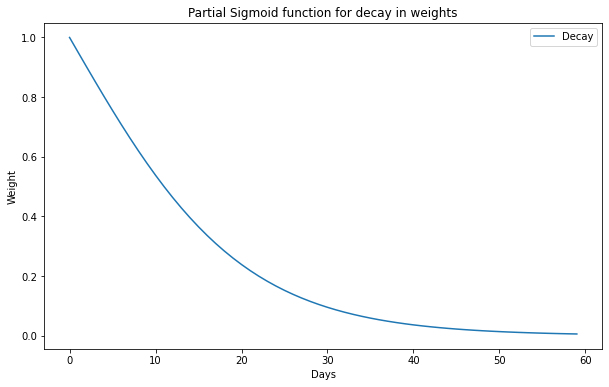

In [1]:
# tryouts - a voter has some OCEAN (from Ocean rounds) and mirror project weight with votes, 50 pct weight suggests votes 
# was 50 pct in actual round. Weight for for ecample for Hilton was voting on project Tomer with 205 tokens from total 
# voted tokens 2 million 'ish' but names are different in every run as model assigns new names. 
# plot shows probabilities (not meaningful) orange shows distribution of tokens in round

# import random
# from model.state_variables_model2 import genesis_state
# voters = genesis_state['voters']
# print(voters[1])

from model.plot_utils import decay_plot
decay_plot()

## Run Model



In [5]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enforce_typing

# Experiments
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

running file: sim_setup.py
SIMULATION_TIME_STEPS:  305
MONTE_CARLO_RUNS:  1
end of file: sim_setup.py


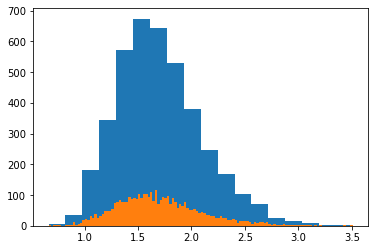

In [6]:
from model.state_variables_model2 import genesis_state
from model.partial_state_update_block_model2 import partial_state_update_block
from model.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS
from model.sys_params_model2 import params

In [7]:
# curator curates projects with verdicts win/loose

model = Model(initial_state=genesis_state, state_update_blocks=partial_state_update_block, params=params)

simulation = Simulation(model=model, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)

simulations = [simulation]
experiment = Experiment(simulations)
# Select the Pathos backend to avoid issues with multiprocessing and Jupyter Notebooks
experiment.engine = Engine(backend=Backend.PATHOS, drop_substeps=True)

result = experiment.run()

## Interpretation of Results

In [8]:
df = pd.DataFrame(result)
df.head()

dao_members                                             voters  grant_cap  \
0          100  [\nVoter={\nname=Voter Dawn; weight=3.07560383...     200000   
1          100  [\nVoter={\nname=Voter Dawn; weight=3.07560383...     200000   
2          100  [\nVoter={\nname=Voter Dawn; weight=3.07560383...     200000   
3          100  [\nVoter={\nname=Voter Dawn; weight=3.07560383...     200000   
4          100  [\nVoter={\nname=Voter Dawn; weight=3.07560383...     200000   

                                            projects  yes_votes  no_votes  \
0  {'Project Rossi': 
Project={
name=Project Ross...      30.00     10.00   
1  {'Project Rossi': 
Project={
name=Project Ross...      30.00     10.00   
2  {'Project Rossi': 
Project={
name=Project Ross...      30.00     10.00   
3  {'Project Rossi': 
Project={
name=Project Ross...      30.00     10.00   
4  {'Project Rossi': 
Project={
name=Project Ross...      30.00     10.00   

   valuable_projects  unsound_projects  \
0                  0                 0   
1                  0                 0   
2                  0                 0   
3                  0                 0   
4                  0                 0   

                                           dao_graph  \
0  (Round 1, Project Rossi, Project Barker, Proje...   
1  (Round 1, Project Rossi, Project Barker, Proje...   
2  (Round 1, Project Rossi, Project Barker, Proje...   
3  (Round 1, Project Rossi, Project Barker, Proje...   
4  (Round 1, Project Rossi, Project Barker, Proje...   

                                                 nft  \
0                                                 {}   
1  {'Travis': (OceanNFT.SHRIMP, 0.000370291781685...   
2  {'Travis': (OceanNFT.SHRIMP, 0.000333385542378...   
3  {'Travis': (OceanNFT.SHRIMP, 0.475276281209616...   
4  {'Travis': (OceanNFT.SHRIMP, 0.427881486206314...   

                                         weight_rate  round  simulation  \
0                                                 {}      1           0   
1  {'Project Rossi': 0.001110875345055784, 'Proje...      1           0   
2  {'Project Rossi': 0.11874650719676484, 'Projec...      1           0   
3  {'Project Rossi': 0.1710387522356088, 'Project...      1           0   
4  {'Project Rossi': 0.1546827471978232, 'Project...      1           0   

   subset  run  substep  timestep  
0       0    1        0         0  
1       0    1        3         1  
2       0    1        3         2  
3       0    1        3         3  
4       0    1        3         4

In [9]:
df1 = df[df['round'] == 1]
p1 = df1['projects']
p1[1]


{'Project Rossi': <model.parts.agents.Project.Project at 0x7fc871a50a00>,
 'Project Barker': <model.parts.agents.Project.Project at 0x7fc871a4d3d0>,
 'Project Deanda': <model.parts.agents.Project.Project at 0x7fc871a4dc70>,
 'Project Lamb': <model.parts.agents.Project.Project at 0x7fc871a3b460>,
 'Project Johnson': <model.parts.agents.Project.Project at 0x7fc871a3beb0>,
 'Project Randall': <model.parts.agents.Project.Project at 0x7fc871a3faf0>,
 'Project Demarco': <model.parts.agents.Project.Project at 0x7fc871a38820>,
 'Project Washam': <model.parts.agents.Project.Project at 0x7fc8503bc640>,
 'Project Worm': <model.parts.agents.Project.Project at 0x7fc8503c1460>,
 'Project Hanson': <model.parts.agents.Project.Project at 0x7fc8503c1fa0>,
 'Project Mynatt': <model.parts.agents.Project.Project at 0x7fc8503c8d00>,
 'Project Lewis': <model.parts.agents.Project.Project at 0x7fc8503cb4f0>,
 'Project Knighten': <model.parts.agents.Project.Project at 0x7fc8503cbd90>,
 'Project Sutton': <model.

In [23]:
dao = df['dao_graph']
dao[5].nodes.data()
nft = df['nft'].apply(pd.Series)

nft.head()
s = nft.shape
for k in range(s[0]):
  for m in range(s[1]):
    if nft.loc[k][m] is not np.nan:
      p = nft.loc[k][m]
      nft.loc[k][m] = p
    else:
      nft.loc[k][m] = 0.0


# nft.loc[1][1][1]


In [24]:
nft.head()

Travis  \
0                                        NaN   
1  (OceanNFT.SHRIMP, 0.00037029178168526136)   
2   (OceanNFT.SHRIMP, 0.0003333855423785895)   
3     (OceanNFT.SHRIMP, 0.47527628120961696)   
4     (OceanNFT.SHRIMP, 0.42788148620631455)   

                                      Dennis  \
0                                        NaN   
1  (OceanNFT.SHRIMP, 0.00037029178168526136)   
2      (OceanNFT.SHRIMP, 0.2378271364029769)   
3     (OceanNFT.SHRIMP, 0.44090832252116885)   
4      (OceanNFT.OYSTER, 0.5965064178783046)   

                                       Laura  \
0                                        NaN   
1  (OceanNFT.SHRIMP, 0.00037029178168526136)   
2      (OceanNFT.OYSTER, 0.9503583551845669)   
3       (OceanNFT.OYSTER, 0.855622455228477)   
4      (OceanNFT.OYSTER, 0.7282200055038165)   

                             Project Rossi  \
0                                      NaN   
1  (OceanNFT.SHRIMP, 0.001110875345055784)   
2   (OceanNFT.SHRIMP, 0.11985738254182063)   
3    (OceanNFT.SHRIMP, 0.2908961347774294)   
4   (OceanNFT.SHRIMP, 0.44557888197525264)   

                                     Debbie  \
0                                       NaN   
1  (OceanNFT.SHRIMP, 0.0032666230415419896)   
2     (OceanNFT.SHRIMP, 0.4778149279522994)   
3     (OceanNFT.SHRIMP, 0.4300545541932808)   
4    (OceanNFT.SHRIMP, 0.44810224206184857)   

                                      Kevin  \
0                                       NaN   
1  (OceanNFT.SHRIMP, 0.0032666230415419896)   
2   (OceanNFT.SHRIMP, 0.002941045273795826)   
3   (OceanNFT.SHRIMP, 0.002503167649319034)   
4   (OceanNFT.SHRIMP, 0.061087580161702355)   

                                       Earl  \
0                                       NaN   
1  (OceanNFT.SHRIMP, 0.0032666230415419896)   
2   (OceanNFT.SHRIMP, 0.002941045273795826)   
3    (OceanNFT.SHRIMP, 0.23976408821003134)   
4     (OceanNFT.SHRIMP, 0.2156470811190179)   

                            Project Barker  \
0                                      NaN   
1  (OceanNFT.SHRIMP, 0.009799869124625969)   
2   (OceanNFT.SHRIMP, 0.05724074121104708)   
3   (OceanNFT.SHRIMP, 0.12077784509012814)   
4    (OceanNFT.SHRIMP, 0.1834289530476012)   

                                    Damian  \
0                                      NaN   
1   (OceanNFT.SHRIMP, 0.01282358646425833)   
2  (OceanNFT.SHRIMP, 0.011545485317465977)   
3    (OceanNFT.OYSTER, 0.9588887693176733)   
4    (OceanNFT.OYSTER, 0.8624538178050278)   

                                    George  ...  Jon  Jay Project Faulkner  \
0                                      NaN  ...  NaN  NaN              NaN   
1   (OceanNFT.SHRIMP, 0.01282358646425833)  ...  0.0  0.0              0.0   
2  (OceanNFT.SHRIMP, 0.011545485317465977)  ...  0.0  0.0              0.0   
3  (OceanNFT.SHRIMP, 0.009826535347777532)  ...  0.0  0.0              0.0   
4  (OceanNFT.SHRIMP, 0.007887019786808603)  ...  0.0  0.0              0.0   

  Kirsten Tyrone Project Macha Norris Eduardo Ernest Project Wilbanks  
0     NaN    NaN           NaN    NaN     NaN    NaN              NaN  
1     0.0    0.0           0.0    0.0     0.0    0.0              0.0  
2     0.0    0.0           0.0    0.0     0.0    0.0              0.0  
3     0.0    0.0           0.0    0.0     0.0    0.0              0.0  
4     0.0    0.0           0.0    0.0     0.0    0.0              0.0  

[5 rows x 417 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
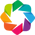

In [1]:
import holoviews as hv
import holoviews.plotting.mpl
from holoviews import opts, dim
import panel as pn
hv.extension("bokeh")
import networkx as nx

In [2]:
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

graph = hv.Graph.from_networkx(dao[1], nx.spring_layout).opts(opts.Graph(inspection_policy='edges', title='Projects Round 1',
        node_color='type', cmap=['blue', 'yellow']))

graph

# hv.HoloMap({i: hv.Graph.from_networkx(dao[i], nx.spring_layout, iterations=i, seed=10) for i in range(1, 5, 1)},
#            kdims='Round 1 - Timestep').opts(opts.Graph(inspection_policy='nodes', node_color='type', cmap=['blue', 'yellow']))



NameError: name 'dao' is not defined

Start arrange
p1: ['Ohmen', 'Mckinney', 'Reeves', 'Ponce', 'Mantini', 'Simpson', 'Lara', 'Neault', 'Wilson', 'Moldrem', 'Mays', 'Fragoso', 'Larose', 'Carey', 'Wagner', 'Hereford', 'Redhead', 'Pena']
p2: ['Ponce', 'Mantini', 'Redhead', 'Simpson', 'Neault', 'Pena', 'Carey', 'Wilson', 'Larose', 'Heron', 'Woock', 'Schnakenberg', 'Smith', 'Watton', 'Ohara', 'Flores', 'Vail', 'Graczyk']
After arrange p2:  ['Ohara', 'Graczyk', 'Flores', 'Ponce', 'Mantini', 'Simpson', 'Woock', 'Neault', 'Heron', 'Wilson', 'Schnakenberg', 'Smith', 'Watton', 'Larose', 'Carey', 'Vail', 'Redhead', 'Pena']
Start arrange
p1: ['Ohara', 'Graczyk', 'Flores', 'Ponce', 'Mantini', 'Simpson', 'Woock', 'Neault', 'Heron', 'Wilson', 'Schnakenberg', 'Smith', 'Watton', 'Larose', 'Carey', 'Vail', 'Redhead', 'Pena']
p2: ['Simpson', 'Redhead', 'Carey', 'Vail', 'Ohara', 'Woock', 'Schnakenberg', 'Mantini', 'Smith', 'Gibeau', 'Riddley', 'Mclead', 'Caplinger', 'Felix', 'Gate', 'Gomez', 'Jimenez', 'Norwood', 'Bridge', 'Williams', 'Torr

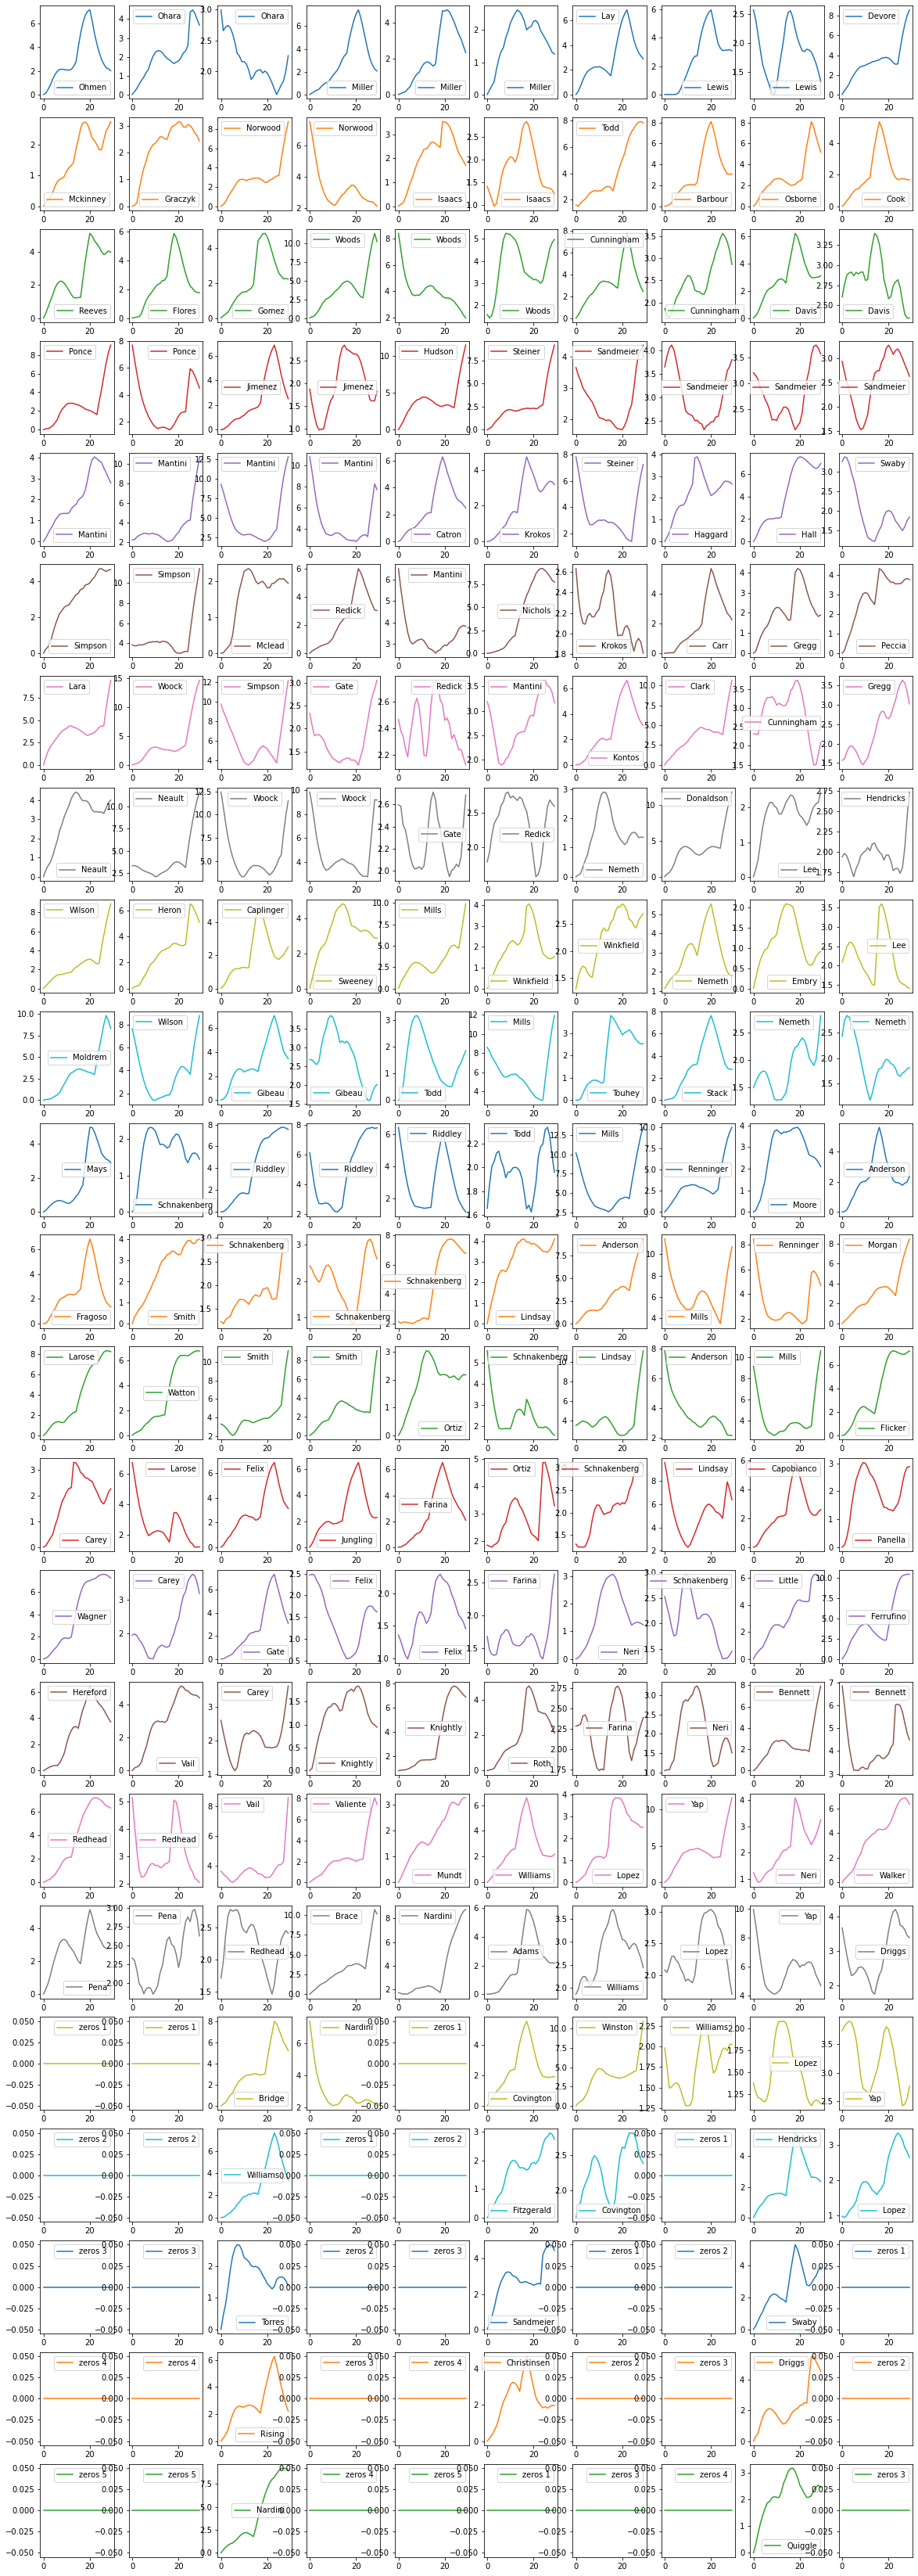

In [10]:
from model.plot_utils import project_plot, project_dfs
project_plot(df, 10)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
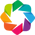

In [ ]:

key_dimensions   = [('year', 'Year'), ('country', 'Country')]
value_dimensions = [('unem', 'Unemployment'), ('capmob', 'Capital Mobility'),
                    ('gdp', 'GDP Growth'), ('trade', 'Trade')]
macro = hv.Table(macro_df, key_dimensions, value_dimensions)

In [23]:
bars = macro.to.bars(['Year', 'Country'], 'Trade', [])
bars.opts(
    opts.Bars(color=hv.Cycle('Category20'), show_legend=False, stacked=True, 
              tools=['hover'], width=600, xrotation=90))

:Bars   [year,country]   (trade)

In [18]:
sorted(list(dao1[183].nodes().data()))

KeyError: 183

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
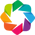

:Graph   [start,end]   (weight)

In [6]:
import networkx as nx 
from networkx.algorithms import bipartite


kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))


attributes = {ndx[0]:ndx[1]['weight'] for ndx in list(dao1[1].nodes().data()) if ndx[1] }
# attributes


graph = hv.Graph.from_networkx(dao1[1], nx.layout.spring_layout)
graph.options(node_size='weight')
# hv.Graph.from_networkx(dao1[1], nx.layout.spring_layout).options(color_index='weight', cmap='Category10')
# graph.options(color_index='index', cmap='Category10').redim.range(**padding)

# graph(graph + graph.opts(inspection_policy='edges', clone=True)).opts(
#     opts.Graph(node_color='Type', edge_color='Weight', cmap='Set1',
#                edge_cmap='viridis', edge_line_width=hv.dim('Weight')*10))

# kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
# opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))
# top = nx.bipartite.sets(dao1[1])[0]
# pos = nx.bipartite_layout(dao1[1], top)
# graph = hv.Graph.from_networkx(dao1[1], nx.circular_layout).opts(opts.Graph(inspection_policy='nodes', tools=['hover'], title='Projects Round 1',
#         edge_cmap='viridis'))
# hv.element.graphs.layout_nodes(graph, layout=nx.layout.bipartite_layout,, kwargs={'nodes': top})

# kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
# opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

# hv.HoloMap({i: hv.Graph.from_networkx(dao1[i], nx.spring_layout, iterations=i, seed=10) for i in range(1, len(dao1), 10)},
#            kdims='Round 1 - Timestep').opts(opts.Graph(inspection_policy='nodes', node_color='type', cmap=['blue', 'yellow']))


In [ ]:
node_labels = ['Output']+['Input']*(N-1)
np.random.seed(7)
edge_labels = np.random.rand(8)

nodes = hv.Nodes((x, y, node_indices, node_labels), vdims='Type')
graph = hv.Graph(((source, target, edge_labels), nodes, paths), vdims='Weight')

(graph + graph.opts(inspection_policy='edges', clone=True)).opts(
    opts.Graph(node_color='Type', edge_color='Weight', cmap='Set1',
               edge_cmap='viridis', node_size=hv.dim('Weight')*50, edge_line_width=hv.dim('Weight')*10))

In [20]:
# top = nx.bipartite.sets(dao3[1])[0]
# pos = nx.bipartite_layout(dao3[1], top)
graph = hv.Graph.from_networkx(dao3[1], nx.circular_layout).opts(opts.Graph(inspection_policy='edges', tools=['hover'], node_color='Type', edge_color='weight', title='Projects Round 3',
        edge_cmap='viridis', node_size=hv.dim('weight')*10, edge_line_width=hv.dim('weight')*10))
graph
# hv.element.graphs.layout_nodes(graph, layout=nx.layout.bipartite_layout, kwargs={'nodes': top})

:Graph   [start,end]

In [6]:
# here we get NFT status in every round. Need to agree what to do with it - 
# can we visualize top 10 NFT projects get 10 pct more votes for example?

avg = np.array([v[1] for v in df['nft'][1].values()])
s = np.array([v[1] for v in df['nft'][1].values()])
pp = np.array([v for v in df['nft'][1].keys()])

for i in range(1,29):
  p1 = np.array([v[1] for v in df['nft'][i].values()])
  p2 = np.array([v[1] for v in df['nft'][i+1].values()])
  p = p2-p1
  # print('pp', pp)
  # print('p: ', p)
  s += p
  avg = s/(i+1)
# print(pp)
# print(avg)
# dp = dict(zip(pp, avg))
# print(dp)
# dps = sorted(dp.items(), key=lambda x: x[1], reverse=True)
# print(dps)
# t = map(sum, zip(*p))
# print(t)
# # df['nft'][17]['Project Lundsten']

df['nft'][90]
# nft_values = [v[1] for v in df['nft'][29].values()]
# nft_values

{'Gregory': (<OceanNFT.FISH: 3>, 1.859354809499455),
 'Dale': (<OceanNFT.DOLPHIN: 4>, 2.0971786052585397),
 'Matthew': (<OceanNFT.OYSTER: 2>, 0.9441344128013825),
 'Project Spellman': (<OceanNFT.DOLPHIN: 4>, 2.9371939409736916),
 'June': (<OceanNFT.SHRIMP: 1>, 0.09760306411328379),
 'James': (<OceanNFT.FISH: 3>, 1.1234195012309485),
 'John': (<OceanNFT.SHRIMP: 1>, 0.2493562379557726),
 'Project Maynard': (<OceanNFT.SHRIMP: 1>, -2.5497901434459215e-15),
 'Myrtle': (<OceanNFT.FISH: 3>, 1.8567355281980302),
 'Irene': (<OceanNFT.FISH: 3>, 1.05241636677452),
 'Anna': (<OceanNFT.FISH: 3>, 1.3781517387111646),
 'Project Mcdougall': (<OceanNFT.FISH: 3>, 1.3538564110474107),
 'Robert': (<OceanNFT.DOLPHIN: 4>, 2.510417966813741),
 'Francisco': (<OceanNFT.FISH: 3>, 1.4896438148700726),
 'Elizabeth': (<OceanNFT.DOLPHIN: 4>, 2.287062773285765),
 'Charles': (<OceanNFT.FISH: 3>, 1.2535684734281392),
 'Project Murphy': (<OceanNFT.SHRIMP: 1>, -2.5496499910935063e-15),
 'Kathy': (<OceanNFT.OYSTER: 2>, 0

In [12]:
df1 = df[(df['run'] == 1) & (df['subset'] == 2)]
df1

dao_members                                             voters  \
366          100  [\nVoter={\nname=Voter Jean; weight=3.07560383...   
367          100  [\nVoter={\nname=Voter Jean; weight=3.07560383...   
368          100  [\nVoter={\nname=Voter Jean; weight=3.07560383...   
369          100  [\nVoter={\nname=Voter Jean; weight=3.07560383...   
370          100  [\nVoter={\nname=Voter Jean; weight=3.07560383...   
..           ...                                                ...   
544           53  [\nVoter={\nname=Voter Leo; weight=0.004791657...   
545           53  [\nVoter={\nname=Voter Leo; weight=0.004791657...   
546           68  [\nVoter={\nname=Voter Leo; weight=0.004791657...   
547           68  [\nVoter={\nname=Voter Leo; weight=0.004791657...   
548           68  [\nVoter={\nname=Voter Leo; weight=0.004791657...   

     grant_cap                                           projects  yes_votes  \
366     200000  {'Project Forest': 
Project={
name=Project For...      30.00   
367     200000  {'Project Forest': 
Project={
name=Project For...      30.00   
368     200000  {'Project Forest': 
Project={
name=Project For...      30.00   
369     200000  {'Project Forest': 
Project={
name=Project For...      30.00   
370     200000  {'Project Forest': 
Project={
name=Project For...      30.00   
..         ...                                                ...        ...   
544     200000  {'Project Bauer': 
Project={
name=Project Baue...       2.22   
545     200000  {'Project Bauer': 
Project={
name=Project Baue...       2.22   
546     200000  {'Project Musgrave': 
Project={
name=Project M...       2.22   
547     200000  {'Project Musgrave': 
Project={
name=Project M...       2.22   
548     200000  {'Project Musgrave': 
Project={
name=Project M...       1.70   

     no_votes  valuable_projects  unsound_projects  \
366     10.00                  0                 0   
367     10.00                  0                 0   
368     10.00                  0                 0   
369     10.00                  0                 0   
370     10.00                  0                 0   
..        ...                ...               ...   
544     36.96                  0                 0   
545     36.96                  0                 0   
546     36.96                  0                 0   
547     36.96                  0                 0   
548     45.52                  0                 0   

                                             dao_graph  \
366  (Round 1, Project Forest, Project Gann, Projec...   
367  (Round 1, Project Forest, Project Gann, Projec...   
368  (Round 1, Project Forest, Project Gann, Projec...   
369  (Round 1, Project Forest, Project Gann, Projec...   
370  (Round 1, Project Forest, Project Gann, Projec...   
..                                                 ...   
544  (Round 1, Project Forest, Project Gann, Projec...   
545  (Round 1, Project Forest, Project Gann, Projec...   
546  (Round 1, Project Forest, Project Gann, Projec...   
547  (Round 1, Project Forest, Project Gann, Projec...   
548  (Round 1, Project Forest, Project Gann, Projec...   

                                                   nft  \
366                                                 {}   
367  {'Project Forest': (OceanNFT.SHRIMP, 0.0011692...   
368  {'Project Forest': (OceanNFT.SHRIMP, 1.5011692...   
369  {'Project Forest': (OceanNFT.SHRIMP, 2.0011692...   
370  {'Project Forest': (OceanNFT.SHRIMP, 2.5636692...   
..                                                 ...   
544  {'Project Forest': (OceanNFT.FISH, 22.84039074...   
545  {'Project Forest': (OceanNFT.FISH, 22.84039074...   
546  {'Project Forest': (OceanNFT.FISH, 22.84039074...   
547  {'Project Forest': (OceanNFT.FISH, 22.84039074...   
548  {'Project Forest': (OceanNFT.FISH, 22.84039074...   

                                           weight_rate  round  simulation  \
366                                                 {}      1          

/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/var/folders/rv/yzbvfx6x4zx528hksnchjfz40000gn/T/ipykernel_31931/48406339.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Text(0.5, 1.0, 'Votes')

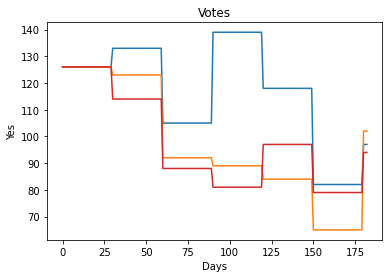

In [11]:
# This is not correct until we have a proper voting policy on what is the impact of yes/no voting

import matplotlib.pyplot as plt

# plot the data

pd.options.mode.chained_assignment = 'warn'

df1 = df[(df['run'] == 1) & (df['subset'] == 0)]
df2 = df[(df['run'] == 1) & (df['subset'] == 1)]
df3 = df[(df['run'] == 1) & (df['subset'] == 2)]

df1.loc[:, 'voter_size'] = df1['voters'].str.len()
df2['voter_size'] = df2['voters'].str.len()
df3['voter_size'] = df3['voters'].str.len()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df1['timestep'], df1["voter_size"],color = 'tab:blue')
ax.plot(df2['timestep'], df2["voter_size"],color ='tab:orange')
ax.plot(df3['timestep'], df3["voter_size"],color ='tab:red')

plt.xlabel('Days')
plt.ylabel('Yes')
plt.title('Votes')





In [7]:
df1 = df[(df['run'] == 1) & (df['simulation'] == 0)]
df2 = df[(df['run'] == 2) & (df['simulation'] == 0)]
df3 = df[(df['run'] == 3) & (df['simulation'] == 0)]
df4 = df[(df['run'] == 4) & (df['simulation'] == 0)]

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)

dfs1 = [df1,df2, df3, df4]

KeyError: 0

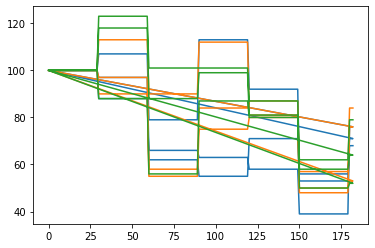

In [10]:
from model.plot_utils import monte_carlo_plot

# monte_carlo_plot(dfs1, 'voters')
monte_carlo_plot(dfs1, 'dao_members')
monte_carlo_plot(dfs1, 'yes_votes')
# monte_carlo_plot(dfs1, 'projects')

monte_carlo_plot(dfs1, 'no_votes')
monte_carlo_plot(dfs1, 'valuable_projects')
monte_carlo_plot(dfs1, 'unsound_projects')
